# EDA Case Study of Trending YouTube Videos [2017-2018]

## Questions for hypothesis testing:

1. What is the like ratio comparison between US and Mexico?

* Like ratio: likes / (likes+dislikes)

    Purpose: to measure sentiment

2. What is the comment per view ratio comparison between US and Mexico?

* Comment ratio: comments / views

    Purpose: to measure engagement

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn 
import json
import numpy as np
import scipy.stats as stats

In [2]:
from dataloader import VideoDataLoader
#load data with the VideoDataLoader class - change self.root_path variable to your local path in dataloader.py
loader = VideoDataLoader()
loader.load_data()
data = loader.data

In [3]:
# country codes are US, CA, DE, FR, GB, IN, KR, MX, RU
USvideos, MXvideos = data['US'], data['MX']

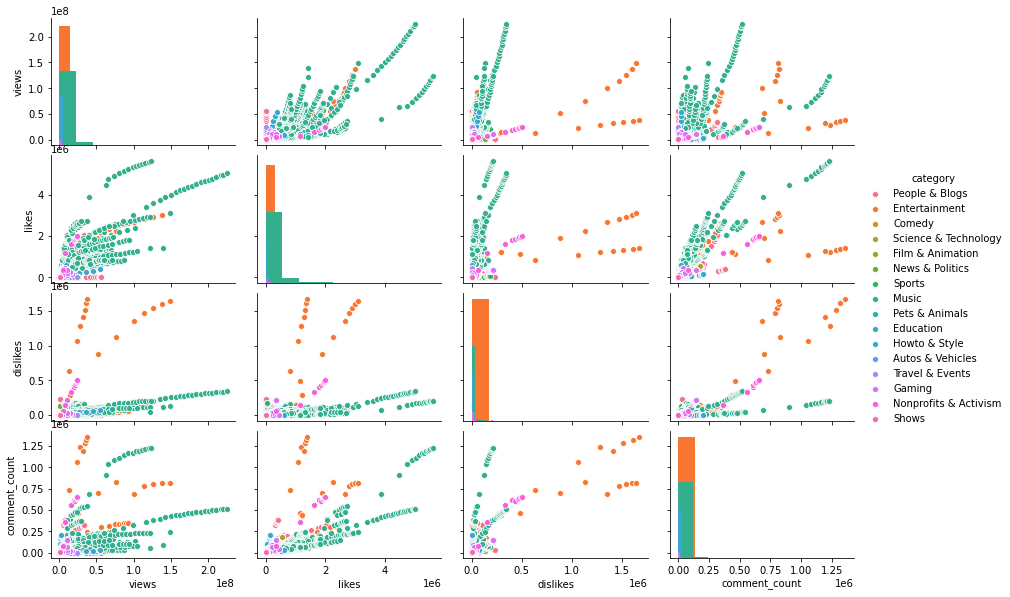

In [4]:
#the long caterpillar-like lines are the same video accumulating views day-over-day
seaborn.pairplot(USvideos, hue='category', diag_kind='hist', vars=['views', 'likes', 'dislikes', 'comment_count'], height=2, aspect=1.5);

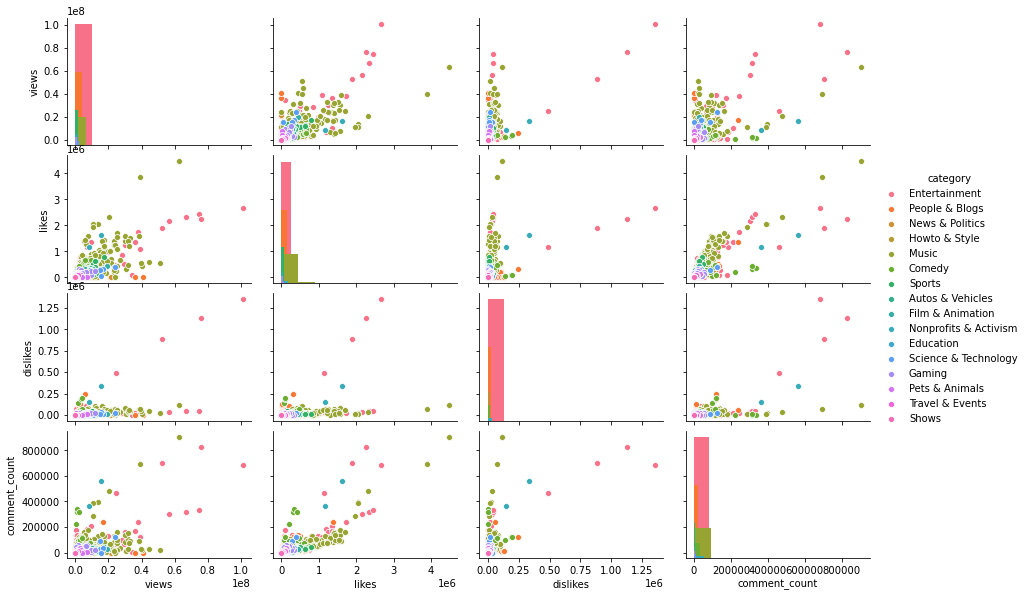

In [5]:
seaborn.pairplot(MXvideos, hue='category', diag_kind='hist', vars=['views', 'likes', 'dislikes', 'comment_count'], height=2, aspect=1.5);

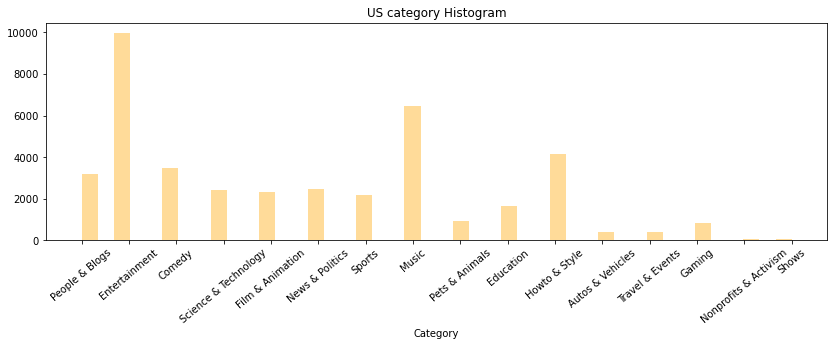

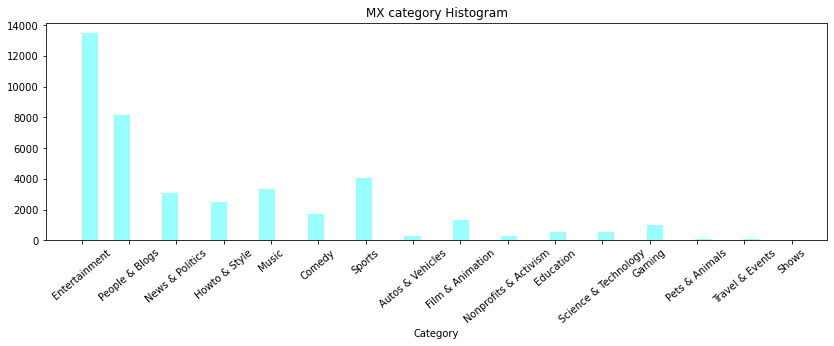

In [10]:
USvideos['category'].hist(bins=44, color='orange', alpha=.4, figsize=(14,4))
plt.title('US category Histogram')
plt.xlabel('Category')
plt.xticks(rotation=40)
plt.grid(None)
plt.show()
MXvideos['category'].hist(bins=44, color='cyan', alpha=.4, figsize=(14,4))
plt.title('MX category Histogram')
plt.xlabel('Category')
plt.xticks(rotation=40)
plt.grid(None)
plt.show()

In [8]:
USvideos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,coms_views_ratio,like_ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.021318,0.950970
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0.005252,0.940521


In [11]:
USvideos.info()
MXvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

In [12]:
#filter for any common videos between US and Mexico data
_USvideos = USvideos[~USvideos['video_id'].isin(MXvideos['video_id'])]
_MXvideos = MXvideos[~MXvideos['video_id'].isin(USvideos['video_id'])]
_USvideos.info()
_MXvideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35795 entries, 3 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                35795 non-null  object 
 1   trending_date           35795 non-null  object 
 2   title                   35795 non-null  object 
 3   channel_title           35795 non-null  object 
 4   category_id             35795 non-null  int64  
 5   publish_time            35795 non-null  object 
 6   tags                    35795 non-null  object 
 7   views                   35795 non-null  int64  
 8   likes                   35795 non-null  int64  
 9   dislikes                35795 non-null  int64  
 10  comment_count           35795 non-null  int64  
 11  thumbnail_link          35795 non-null  object 
 12  comments_disabled       35795 non-null  bool   
 13  ratings_disabled        35795 non-null  bool   
 14  video_error_or_removed  35795 non-null

In this step, we decided to drop videos that showed up in both country datasets. Whether this was strictly necessary is debateable but we were trying to remove the possibility of comparing datasets with identical data points.

In [13]:
#a look at repeats
USvideos['video_id'].value_counts()

j4KvrAUjn6c    30
MAjY8mCTXWk    29
t4pRQ0jn23Q    29
NBSAQenU2Bk    29
QBL8IRJ5yHU    29
               ..
WArjc_PF2b4     1
5RjEaUqucbw     1
r_UPEj0er_s     1
46TOhKEwtsE     1
mRo6MnXObuE     1
Name: video_id, Length: 6351, dtype: int64

In [15]:
USvideos[USvideos['video_id'] == 't4pRQ0jn23Q'].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,coms_views_ratio,like_ratio
34751,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,Entertainment,0.006053,0.954309
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,Entertainment,0.006053,0.954309


Here we see an example of duplicates within a country dataset. Every day a video remains trending, it is added to the dataset again. This is a clear case of dependency w.r.t accumulating statistics.

## Question: Does the ratio of comments to views differ between US and Mexico?

Null Hypothesis: The ratio of comments to views does not differ between US and Mexico.

Alt Hypothesis: The ratio of comments to views differs between US and Mexico.

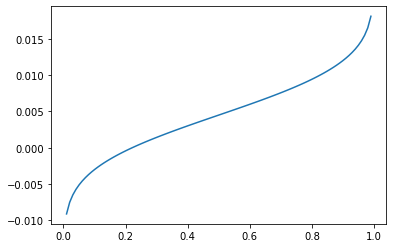

In [16]:
xbar = _USvideos['coms_views_ratio'].mean()
sd_error = np.std(_USvideos['coms_views_ratio'], ddof=1)
norm = stats.norm(loc=xbar, scale=sd_error)

x = np.linspace(0,1,100)
fig,ax = plt.subplots()
ax.plot(x, norm.ppf(x));

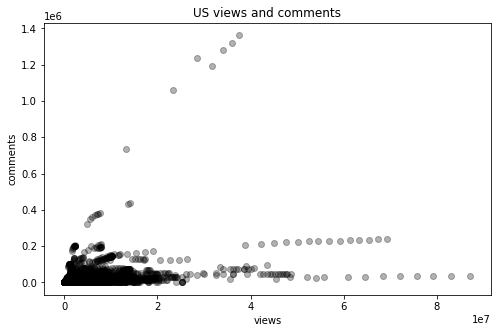

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(_USvideos['views'], _USvideos['comment_count'], alpha=.3, color='black')
ax.set_xlabel('views')
ax.set_ylabel('comments')
ax.set_title("US views and comments");

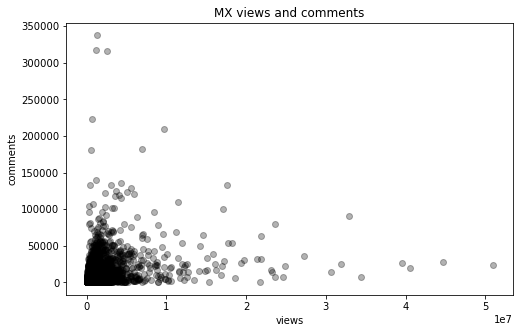

In [18]:
#MX videos have less long lines indicating a repeating video
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(_MXvideos['views'], _MXvideos['comment_count'], alpha=.3, color='black')
ax.set_xlabel('views')
ax.set_ylabel('comments')
ax.set_title("MX views and comments");

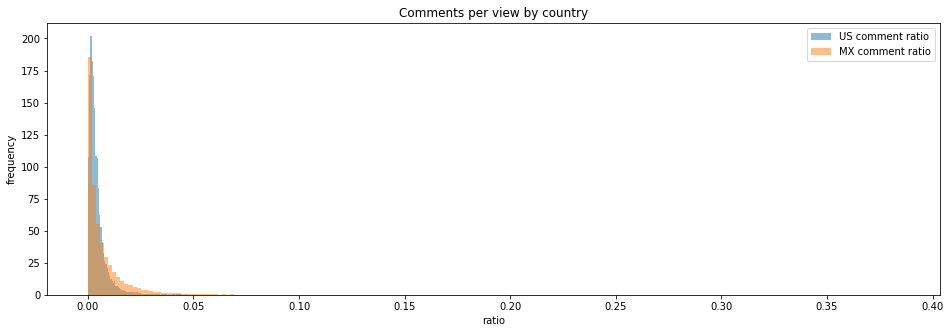

In [141]:
fig, ax = plt.subplots(figsize=(16,5))
ax.hist(_USvideos['coms_views_ratio'] , density = True, alpha = 0.5, label= 'US comment ratio', bins=200)
ax.hist(_MXvideos['coms_views_ratio'] , density = True, alpha = 0.5, label= 'MX comment ratio', bins=200)
ax.set_ylabel('frequency')
ax.set_xlabel('ratio')
ax.set_title("Comments per view by country")
ax.legend();

In [21]:
#there are some very high values in the MX data comment ratio which is why the plot above goes to .4
#we might guess that MX videos have a higher engagement at this point
_MXvideos.sort_values(by=['coms_views_ratio'], ascending=False).head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,coms_views_ratio,like_ratio
22700,NbOeUKD9I00,18.09.03,TE REGALO un IPHONE X - SORTEO GRATIS INTERNAC...,HunterTops,24,2018-03-09T01:42:57.000Z,TE REGALO un IPHONE X - SORTEO GRATIS INTERNAC...,2745,677,8,1055,https://i.ytimg.com/vi/NbOeUKD9I00/default.jpg,False,False,False,TE REGALO un IPHONE X - SORTEO GRATIS INTERNAC...,Entertainment,0.384335,0.988321
7284,JSQX37nXW7w,17.20.12,MEGA SORTEO De Navidad PARTE 4!! 🎁 3 PREMIOS M...,Mariale,24,2017-12-19T23:00:00.000Z,"mariale|""mariale marrero""|""sorteo""|""sorteo mar...",253045,56751,733,96586,https://i.ytimg.com/vi/JSQX37nXW7w/default.jpg,False,False,False,ESTE ES EL ÚLTIMO DE 4 VIDEOS DE SORTEO EN DIC...,Entertainment,0.381695,0.987249


In [22]:
#Welch's test
result = stats.ttest_ind(_USvideos['coms_views_ratio'], _MXvideos['coms_views_ratio'], equal_var= False)
alpha = .05
print(f'alpha {alpha}')
print(f't-stat {round(result[0],1)}')
print(f'p-value {result[1]}')

alpha 0.05
t-stat -41.2
p-value 0.0


The p-value is less than my significance level. Therefore my conclusion is:

    I reject the null hypothesis that the comments per view are the same in the US and Mexico!!

* Did you consider how low view rates might change things? That might be an outlier on the high end of the ratio.

## Question: Does the like ratio differ between US and Mexico?

Null Hypothesis: The ratio of likes to total likes and dislikes does not differ between US and Mexico.

Alt Hypothesis: The ratio of likes to total likes and dislikes differs between US and Mexico.

In [23]:
#we're getting some null values in the like ratio that we'll have to remove before conducting a t-test
print(_USvideos['like_ratio'].isna().sum(), _MXvideos['like_ratio'].isna().sum())

156 629


In [24]:
_USvideos = _USvideos[~_USvideos['like_ratio'].isna()]
_MXvideos = _MXvideos[~_MXvideos['like_ratio'].isna()]

In [25]:
print(_USvideos['like_ratio'].isna().sum(), _MXvideos['like_ratio'].isna().sum())

0 0


In [26]:
_USvideos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,coms_views_ratio,like_ratio
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,0.006253,0.938550
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,0.008359,0.985181


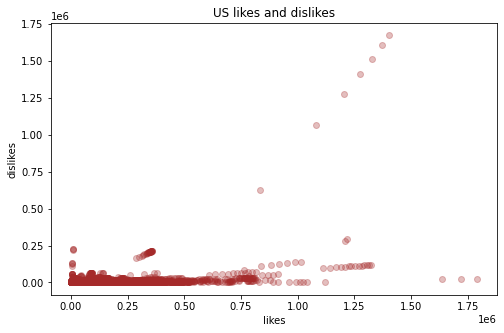

In [27]:
#it appears that likes far outweigh dislikes
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(_USvideos['likes'], _USvideos['dislikes'], alpha=.3, color='brown')
ax.set_xlabel('likes')
ax.set_ylabel('dislikes')
ax.set_title("US likes and dislikes");

In [28]:
#what is that video in the top right?
_USvideos.iloc[_USvideos['dislikes'].argmax()]

video_id                                                        QwZT7T-TXT0
trending_date                                                      18.09.01
title                                                             So Sorry.
channel_title                                              Logan Paul Vlogs
category_id                                                              24
publish_time                                       2018-01-02T16:42:21.000Z
tags                      logan paul vlog|"logan paul"|"logan"|"paul"|"o...
views                                                              37539570
likes                                                               1402578
dislikes                                                            1674420
comment_count                                                       1361580
thumbnail_link               https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg
comments_disabled                                                     False
ratings_disa

Text(0.5, 1.0, 'MX likes and dislikes')

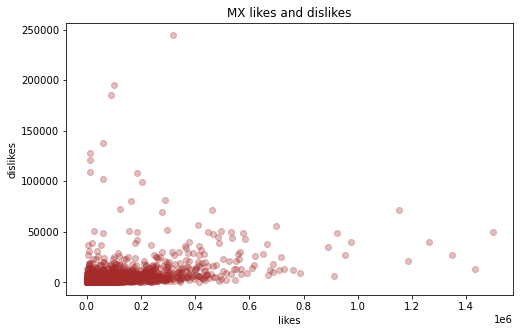

In [29]:
#here we see a slightly more balanced like-dislike ratio
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(_MXvideos['likes'], _MXvideos['dislikes'], alpha=.3, color='brown')
ax.set_xlabel('likes')
ax.set_ylabel('dislikes')
ax.set_title("MX likes and dislikes")

In [30]:
#and the winner for most hated is Jake Paul
_MXvideos.iloc[_MXvideos['dislikes'].argmax()]

video_id                                                        pOHQdIDds6s
trending_date                                                      17.24.11
title                     Jake Paul - It's Everyday Bro (Remix) [feat. G...
channel_title                                                     Jake Paul
category_id                                                              22
publish_time                                       2017-11-23T00:00:51.000Z
tags                      Jake|"Paul"|"logan"|"paul"|"its"|"every"|"day"...
views                                                               5901092
likes                                                                318445
dislikes                                                             244239
comment_count                                                        120915
thumbnail_link               https://i.ytimg.com/vi/pOHQdIDds6s/default.jpg
comments_disabled                                                     False
ratings_disa

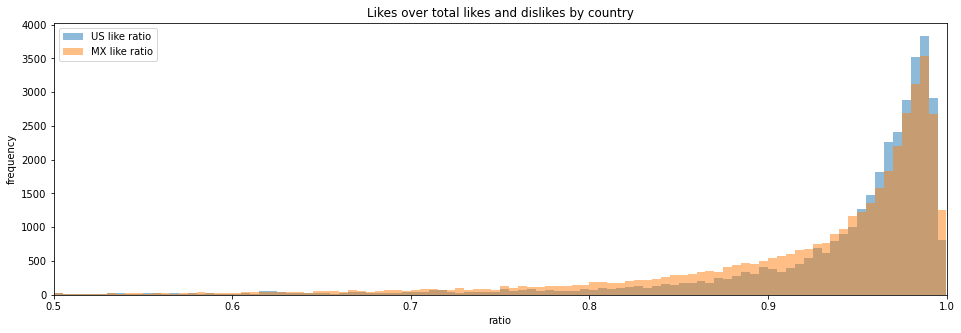

In [139]:
fig, ax = plt.subplots(figsize=(16,5))
ax.hist(_USvideos['like_ratio'] , alpha = 0.5, label= 'US like ratio', bins=200)
ax.hist(_MXvideos['like_ratio'] , alpha = 0.5, label= 'MX like ratio', bins=200)
ax.set_ylabel('frequency')
ax.set_xlabel('ratio')
ax.set_xlim(.5,1)
ax.set_title("Likes over total likes and dislikes by country")
ax.legend();

In [32]:
#Welch's test
result = stats.ttest_ind(_USvideos['like_ratio'], _MXvideos['like_ratio'], equal_var= False)
print(f'alpha {alpha}')
print(f't-stat {round(result[0],1)}')
print(f'p-value {round(result[1], 2)}')

alpha 0.05
t-stat 16.3
p-value 0.0


The p-value is less than my significance level. Therefore my conclusion is:

    I reject the null hypothesis that the like ratio is same in the US and Mexico!!

In [33]:
RUvideos, CAvideos, DEvideos, FRvideos, GBvideos, INvideos, KRvideos = data['RU'], data['CA'], data['DE'], data['FR'], data['GB'], data['IN'], data['KR']

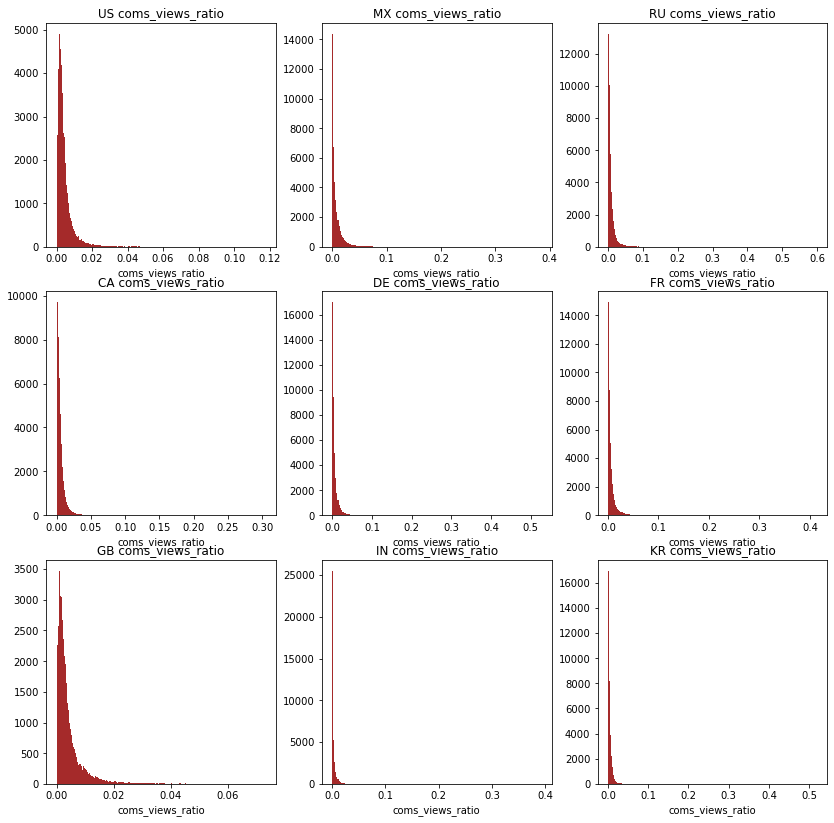

In [156]:
codes = ['US', 'MX', 'RU', 'CA', 'DE', 'FR', 'GB', 'IN', 'KR']
dfs = [USvideos, MXvideos, RUvideos, CAvideos, DEvideos, FRvideos, GBvideos, INvideos, KRvideos]

metric = 'coms_views_ratio'
fig, ax = plt.subplots(3, 3, figsize=(14, 14))

for i, (df, co) in enumerate(zip(dfs, codes)):
    ax[i//3, i%3].hist(df[metric], color='brown', bins=200)
    ax[i//3, i%3].set_xlabel(f'{metric}')
    ax[i//3, i%3].set_title(f'{co} {metric}')
    #ax[i//3, i%3].set_xlim(0, .1)
    
plt.tight_layout;

In [203]:
loader.category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

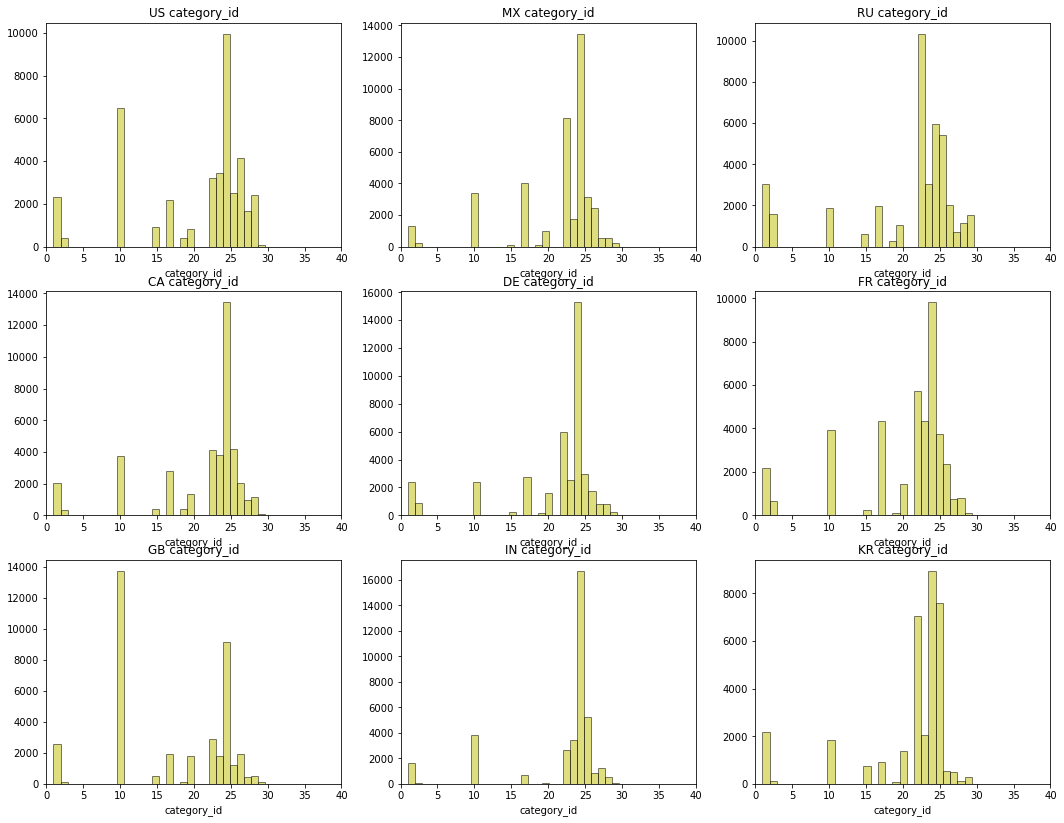

In [208]:
metric = 'category_id'
fig, ax = plt.subplots(3, 3, figsize=(18, 14))

for i, (df, co) in enumerate(zip(dfs, codes)):
    ax[i//3, i%3].hist(df[metric], color='y', alpha=.5, edgecolor='black', bins=44)
    ax[i//3, i%3].set_xlabel(f'{metric}')
    ax[i//3, i%3].set_title(f'{co} {metric}')
    ax[i//3, i%3].set_xlim(0, 40)
plt.tight_layout;